**Importing libraries and the functions**


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

**Importing DataSet**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset=pd.read_excel("/content/a_Dataset_CreditScoring.xlsx")

**Data Preparation**

In [ ]:
# shows count of rows and columns
dataset.shape

(3000, 30)

In [ ]:
# explore missing values
dataset.isna().sum()

,0
TARGET,0
ID,0
DerogCnt,0
CollectCnt,0
BanruptcyInd,0
InqCnt06,0
InqTimeLast,188
InqFinanceCnt24,0
TLTimeFirst,0
TLTimeLast,0


In [ ]:
# filling missing values with mean
dataset=dataset.fillna(dataset.mean())

In [ ]:
# explore missing values post missing value fix
dataset.isna().sum()

,0
TARGET,0
ID,0
DerogCnt,0
CollectCnt,0
BanruptcyInd,0
InqCnt06,0
InqTimeLast,0
InqFinanceCnt24,0
TLTimeFirst,0
TLTimeLast,0


In [ ]:
#dropping customer ID column from the dataset
dataset=dataset.drop('ID',axis=1)
dataset.shape

(3000, 29)

**Train Test Split**

In [ ]:
y = dataset.iloc[:, 0].values
X = dataset.iloc[:, 1:29].values

In [ ]:
# splitting dataset into training and test (in ratio 80:20)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Exporting Normalisation Coefficients for later use in prediction
import joblib
joblib.dump(sc, '/content/f2_Normalisation_CreditScoring')

['/content/f2_Normalisation_CreditScoring']

**Risk Model building**

In [ ]:
classifier =  LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
# Exporting Logistic Regression Classifier for later use in prediction

# import joblib
joblib.dump(classifier, '/content/f2_Normalisation_CreditScoring')

['/content/f2_Normalisation_CreditScoring']

**Model Performance**

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[487  13]
 [ 87  13]]


In [ ]:
print(accuracy_score(y_test, y_pred))

0.8333333333333334


**Writing Output File**

In [ ]:
predictions = classifier.predict_proba(X_test)
predictions

array([[0.61598311, 0.38401689],
       [0.98854759, 0.01145241],
       [0.87096661, 0.12903339],
       ...,
       [0.9445091 , 0.0554909 ],
       [0.46946796, 0.53053204],
       [0.94009714, 0.05990286]])

In [ ]:
# writing model output file

df_prediction_prob = pd.DataFrame(predictions, columns = ['prob_0', 'prob_1'])
df_prediction_target = pd.DataFrame(classifier.predict(X_test), columns = ['predicted_TARGET'])
df_test_dataset = pd.DataFrame(y_test,columns= ['Actual Outcome'])

dfx=pd.concat([df_test_dataset, df_prediction_prob, df_prediction_target], axis=1)

dfx.to_csv("/content/drive/My Drive/Colab Notebooks/c1_Model_Prediction.xlsx", sep=',', encoding='UTF-8')

dfx.head()

,Actual Outcome,prob_0,prob_1,predicted_TARGET
0,1,0.615983,0.384017,0
1,0,0.988548,0.011452,0
2,1,0.870967,0.129033,0
3,0,0.954084,0.045916,0
4,1,0.726195,0.273805,0


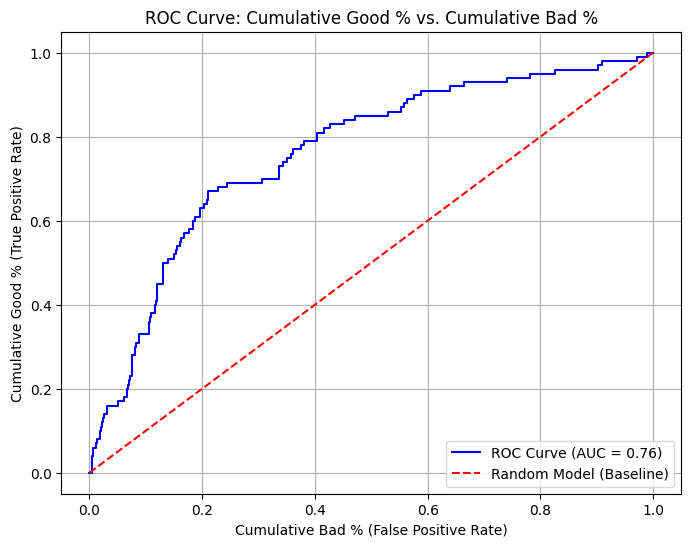

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities for class 1 (positive class)
y_prob = predictions[:, 1]  # Probabilities of class 1 (good)

# Compute TPR, FPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC (optional, for reference)
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='Random Model (Baseline)')
plt.title('ROC Curve: Cumulative Good % vs. Cumulative Bad %')
plt.xlabel('Cumulative Bad % (False Positive Rate)')
plt.ylabel('Cumulative Good % (True Positive Rate)')
plt.legend(loc='lower right')
plt.grid()
plt.show()
